# Leonardo Lobato Dias Leite Hügens

# TPC1 - Integração Numérica

In [1]:
import numpy as np
from matplotlib.pyplot import plot,show,xscale,yscale,title,xlabel,ylabel,grid,legend
import scipy.optimize as opt

# Exercício 1

1 - a) Cálculo do campo no eixo vertical a uma distância z do centro

In [2]:
def fz(u,zl):
    return zl + np.zeros(len(u))
def fx(u):
    return (-1)*np.cos(u)
def fy(u):
    return (-1)*np.sin(u)

def E(zl,M,thetaf):
    M = (M//2)*2
    h = (thetaf)/M
    #theta = np.arange(0,(thetaf)+h/2,h)
    theta = np.linspace(0,thetaf,M+1)
    fzz = fz(theta,zl)
    fxx = fx(theta)
    fyy = fy(theta)
    sz = (1/3)*h*(fzz[0]+fzz[-1]+4*np.sum(fzz[1:-1:2])+2*np.sum(fzz[2:-1:2]))
    sx = (1/3)*h*(fxx[0]+fxx[-1]+4*np.sum(fxx[1:-1:2])+2*np.sum(fxx[2:-1:2]))
    sy = (1/3)*h*(fyy[0]+fyy[-1]+4*np.sum(fyy[1:-1:2])+2*np.sum(fyy[2:-1:2]))
    return (1/(2*np.pi*((zl**2+1)**(3/2)))) * np.array([sx,sy,sz])
#E(zl,M,thetaf)
E(1,10,np.pi)

array([-2.61682076e-18, -1.12545702e-01,  1.76776695e-01])

1 - b) Desvio em relação ao valor exato do campo em função de h

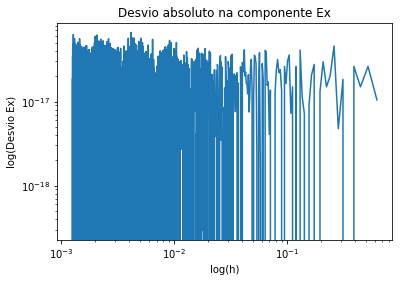

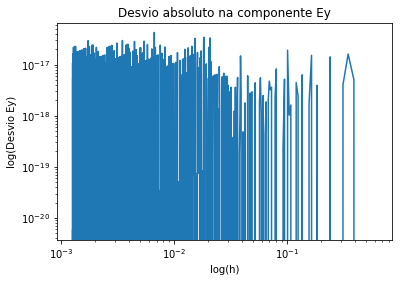

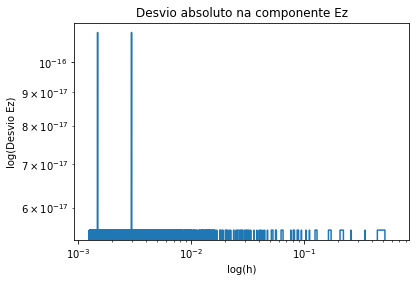

In [3]:
def draw(zl,M1,M2):
    certo = (zl/((zl**2+1)**(3/2)))
    Mn = np.arange(M1,M2,2)
    tf = 2*np.pi
    hn = (tf / Mn)
    desviox = list(map(lambda Mi:E(zl,Mi,tf)[0] , Mn ))
    desvioy = list(map(lambda Mi:E(zl,Mi,tf)[1] , Mn ))
    desvioz = list(map(lambda Mi:abs(E(zl,Mi,tf)[2]-certo) , Mn ))
    desvios = [desviox,desvioy,desvioz]
    título = ['Ex','Ey','Ez']
    for i in range(3):
        title('Desvio absoluto na componente '+título[i])
        xlabel('log(h)')
        ylabel('log(Desvio '+título[i]+')')
        yscale('log')
        xscale('log')
        plot(hn,desvios[i])
        show()
draw(1,10,5000) 

Todos os erros obtidos são residuais, não se observando uma dependência numérica com a diminuição de h, já que as funções integrandas das componentes Ex e Ey são pares ou ímpares relativamente ao ponto central do intervalo. O erro da componente Ez é ainda mais residual, já que se trata de uma constante que se está a integrar. Os erros residuais que se verificam são provavelmento devido à truncatura realizada pelo computador.

1 - c)

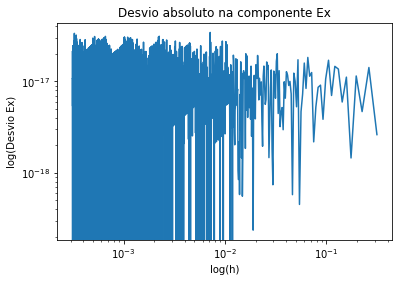

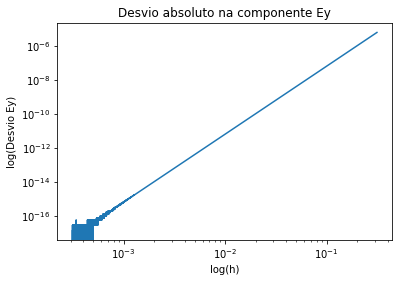

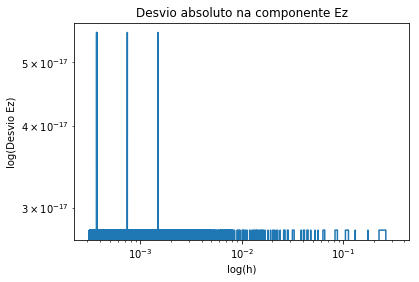

In [4]:
def draw_(zl,M1,M2):
    certox = 0
    certoy = -2*(1/((2*np.pi)*(zl**2+1)**(3/2)))
    certoz = (zl/((zl**2+1)**(3/2)))/2
    Mn = np.arange(M1,M2,2)
    tf = np.pi
    hn = (tf / Mn)
    desviox = list(map(lambda Mi:abs(E(zl,Mi,tf)[0]) , Mn ))
    desvioy = list(map(lambda Mi:abs(E(zl,Mi,tf)[1]-certoy) , Mn ))
    desvioz = list(map(lambda Mi:abs(E(zl,Mi,tf)[2]-certoz) , Mn ))
    desvios = [desviox,desvioy,desvioz]
    título = ['Ex','Ey','Ez']
    for i in range(3):
        title('Desvio absoluto na componente '+título[i])
        xlabel('log(h)')
        ylabel('log(Desvio '+título[i]+')')
        yscale('log')
        xscale('log')
        plot(hn,desvios[i])
        show()
draw_(1,10,10000) 

No intervalo de 0 a pi o erro da função integranda da componente x não sofre grandes alterações, já que o cosseno é uma função ímpar relativamente ao centro desse intervalo. O erro de z também não sofre alterações, devido ao facto de ser uma constante. Contudo, já que o integral correpondente à componente Ey não é 0, não há termos no somatório de simpson que anulem mutuamente o seu erro correspondente, e assim verifica-se um erro que decresce exponencialmente com a diminuição de h, o que é de esperar.

2 - a)

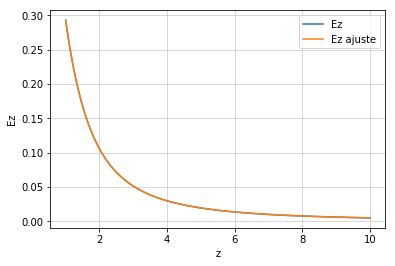

array([0.48960682, 0.67439888, 1.98762959])

In [5]:
def ajuste(x,a,b,c):
    return a / ( (x**c) + b )

def f2z(r,zl):
    return ((r*zl)/((zl**2+r**2)**(3/2)))

def E2(zl,N,M):
    h = N/M
    #rn = np.arange(0,N+h,h)
    rn = np.linspace(0,N,M+1)
    fr = f2z(rn,zl)
    sz = (1/3)*h*(fr[0]+fr[-1]+4*np.sum(fr[1:-1:2])+2*np.sum(fr[2:-1:2]))
    return sz

def draw3(zl1,zl2,M):
    param = [1,1,1]
    zln = np.linspace(zl1,zl2,1000)
    Ezln = list(map(lambda zl: E2(zl,1,M) , zln))
    Ezajuste1 = ajuste(zln,param[0],param[1],param[2])
    popt, pcov = opt.curve_fit(ajuste,zln,Ezln)
    Ezajustef = ajuste(zln,popt[0],popt[1],popt[2])
    #const = Ezln / Ezajustef
    grid(linewidth=0.5)
    plot(zln,Ezln,label='Ez')
    plot(zln,Ezajustef,label='Ez ajuste')
    xlabel('z')
    ylabel('Ez')
    legend()
    #plot(zln,const)
    show()
    return popt
draw3(1,10,1000)
#E2(1,1,1000)

2 - b) No gráfico apresentado na célula anterior estão representadas na verdade duas curvas: o campo real e um campo de ajuste, feito com o a função curve_fit do módulo optimize do scipy. Como é claro, o ajuste é ótimo, e a terceira componente do array contém o inverso da potência com que o campo decai, sendo este aproximadamente 2, como é de esperar, já que para grandes distâncias a dimensão do disco é desprezável, podendo ser considerado uma carga pontual, cujo campo decai realmente com o inverso do quadrado. Em princípio esta análise daria exatamente os mesmos resultados se tivesse sido feita noutra direção, já que o campo de uma carga pontual, a que o disco é aproximado, tem simetria esférica.

2 - c) 

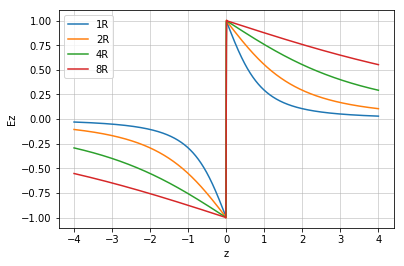

In [6]:
def draw4(zl1,zl2,M):
    zln = np.linspace(zl1,zl2,1000)
    for i in range(4):
        Ezln = list(map(lambda zl: E2(zl,(2**i),M) , zln))
        grid(linewidth=0.5)
        plot(zln,Ezln,label=str(2**i)+'R')
        legend()
    xlabel('z')
    ylabel('Ez')
    show()
draw4(-4,4,1000)

Como se pode observar na figura, o declive das curvas (que se vão aproximando de retas) vai diminuido significativamente com o aumento do raio do disco, o que está de acordo com o teorema de gauss, que prevê um campo constante para um plano, ou "um disco de raio infinito".

3 - a)

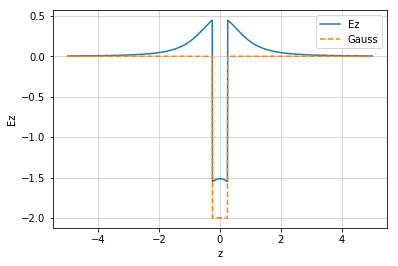

In [7]:
def gauss1(z,delta):
    if abs(z) < (delta/2):
        return -2
    else: 
        return 0

def draw5(delta,zl1,zl2,M):
    zln = np.linspace(zl1,zl2,M)
    Ezln1 = np.array(list(map(lambda zl: E2(zl-(delta/2),1,M) , zln)))
    Ezln2 = np.array(list(map(lambda zl: E2(zl+(delta/2),1,M) , zln)))
    Ezln = Ezln1 - Ezln2
    Gauss = np.array(list(map(lambda zl: gauss1(zl,delta) , zln)))
    grid(linewidth=0.5)
    plot(zln,Ezln,label='Ez')
    plot(zln,Gauss,'--',label='Gauss')
    xlabel('z')
    ylabel('Ez')
    legend()
    show()
draw5(0.5,-5,5,1000)

3 - b)

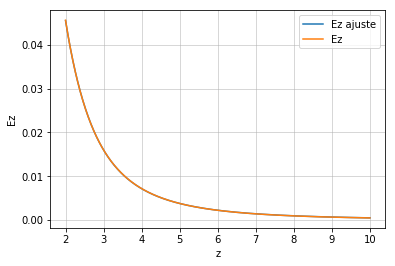

array([0.42217369, 1.71911693, 2.91922877])

In [8]:
def draw5_(delta,zl1,zl2,M):
    zln = np.linspace(zl1,zl2,M)
    Ezln1 = np.array(list(map(lambda zl: E2(zl-(delta/2),1,M) , zln)))
    Ezln2 = np.array(list(map(lambda zl: E2(zl+(delta/2),1,M) , zln)))
    Ezln = Ezln1 - Ezln2
    popt, pcov = opt.curve_fit(ajuste,zln,Ezln)
    Ezajustef = ajuste(zln,popt[0],popt[1],popt[2])
    grid(linewidth=0.5)
    xlabel('z')
    ylabel('Ez')
    plot(zln,Ezajustef,label='Ez ajuste')
    plot(zln,Ezln,label='Ez')
    legend()
    show()
    return popt
draw5_(0.5,2,10,1000)

Como se pode observar na figura anterior, que contém as curvas correpondentes ao campo obtido por integração e ao respetivo ajuste, são coincidentes, o que indica que foi feito um bom ajuste. De acordo com este ajuste, o campo varia com o inverso do cubo da distância z (terceira componente do array apresentado em baixo do gráfico da figura anterior). Este resultado é consistente com a observação de que para distâncias muito maiores que o raio dos discos, este conjunto trata-se aproximadamente com um dipolo elétrico, cujo campo decai realmente com o inverso do cubo da distância.

3 - c)

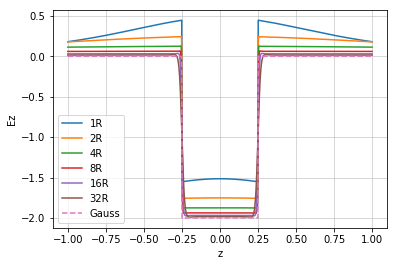

In [9]:
def draw6(delta,zl1,zl2,M):
    zln = np.linspace(zl1,zl2,M)
    grid(linewidth=0.5)
    for i in [1,2,4,8,16,32]:
        Ezln1 = np.array(list(map(lambda zl: E2(zl-(delta/2),i,M) , zln)))
        Ezln2 = np.array(list(map(lambda zl: E2(zl+(delta/2),i,M) , zln)))
        Ezln = Ezln1 - Ezln2
        plot(zln,Ezln,label=str(i)+'R')
    Gauss = np.array(list(map(lambda zl: gauss1(zl,delta) , zln)))
    plot(zln,Gauss,'--',label='Gauss')
    xlabel('z')
    ylabel('Ez')
    legend()
    show()
draw6(0.5,-1,1,1000)

4 - a)

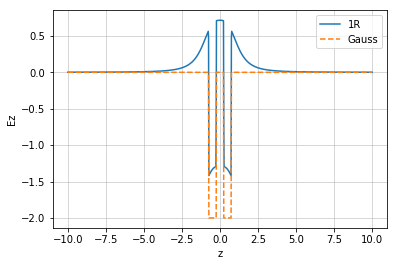

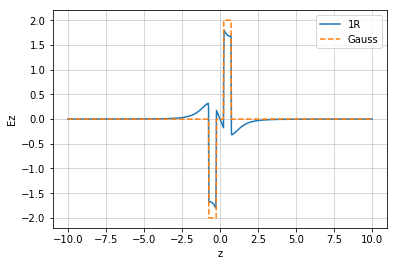

In [10]:
def gauss2(z,delta):
    if abs(z) >= ((3/2)*delta) or abs(z)<= (delta/2):
        return 0
    else:
        return -2
    
def gauss3(z,delta):
    if abs(z) >= ((3/2)*delta) or abs(z) <= (delta/2):
        return 0
    else:
        if z > (delta/2):
            return 2
        else:
            return -2

def draw7(config,delta,N,zl1,zl2,M):
    zln = np.linspace(zl1,zl2,M)
    raios = 2**np.arange(0,N,1)
    Ezln = 0
    deltas = np.array([(3/2)*delta,delta/2,-delta/2,(-3/2)*delta])
    grid(linewidth=0.5)
    if config == 0:
        for j in raios:
            for i in range(4):
                Ezln = Ezln + np.array(list(map(lambda zl: E2(zl-deltas[i],j,M) , zln))) *((-1)**i)
            plot(zln,Ezln,label=str(j)+'R')
            Ezln = 0
        Gauss = np.array(list(map(lambda zl: gauss2(zl,delta) , zln)))
        plot(zln,Gauss,'--',label='Gauss')
        xlabel('z')
        ylabel('Ez')
        legend()
        show()
    else:
        sinal=[-1,1,1,-1]
        for j in raios:
            for i in range(4):
                Ezln = Ezln + np.array(list(map(lambda zl: E2(zl-deltas[i],j,M) , zln))) * sinal[i]
            plot(zln,Ezln,label=str(j)+'R')
            Ezln = 0
        Gauss = np.array(list(map(lambda zl: gauss3(zl,delta) , zln)))
        plot(zln,Gauss,'--',label='Gauss')
        xlabel('z')
        ylabel('Ez')
        legend()
        show()
draw7(0,0.5,1,-10,10,1000)
draw7(1,0.5,1,-10,10,1000)

Dependência de distâncias longas

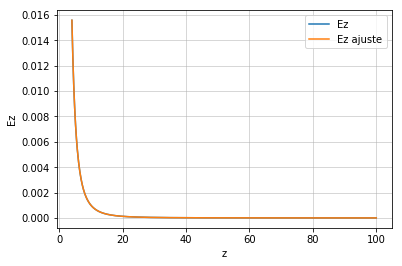

[1.01238473 0.51429236 3.00471845]


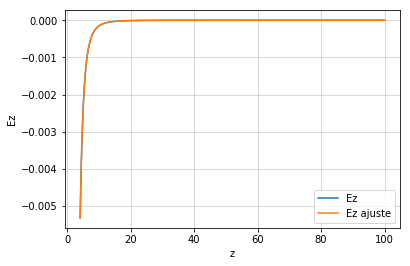

[-1.33725567 10.99581725  3.95444186]


In [11]:
def depend(config,zl1,zl2):
    M = 1000
    N = 1
    delta = 0.5
    zln = np.linspace(zl1,zl2,M)
    Ezln = 0
    deltas = np.array([(3/2)*delta,delta/2,-delta/2,(-3/2)*delta])
    grid(linewidth=0.5)
    if config == 0:
        for i in range(4):
                Ezln = Ezln + np.array(list(map(lambda zl: E2(zl-deltas[i],N,M) , zln))) *((-1)**i)
        popt,pcov = opt.curve_fit(ajuste,zln,Ezln)
        Eajuste = ajuste(zln,popt[0],popt[1],popt[2])
        plot(zln,Ezln,label='Ez')
        plot(zln,Eajuste,label='Ez ajuste')
        xlabel('z')
        ylabel('Ez')
        legend()
        show()
        print(popt)
    else:
        sinal=[-1,1,1,-1]
        for i in range(4):
                Ezln = Ezln + np.array(list(map(lambda zl: E2(zl-deltas[i],N,M) , zln))) * sinal[i]
        popt,pcov = opt.curve_fit(ajuste,zln,Ezln)
        Eajuste = ajuste(zln,popt[0],popt[1],popt[2])
        plot(zln,Ezln,label='Ez')
        plot(zln,Eajuste,label='Ez ajuste')
        xlabel('z')
        ylabel('Ez')
        legend()
        show()
        print(popt)
depend(0,4,100)
depend(1,4,100)

Como se pode observar nas últimas componentes dos arrays da célula anterior, correspondentes aos inversos das potências de z com que o campo varia, na primeira configuração o campo decai com o inverso do cubo da distância z, de forma semelhante ao campo de um dipólo elétrico. O momento dipolar desta configuração é diferente de 0, como para distâncias muito maiores que o raio os discos são aproximadamente pontuais, pode-se fazer esta comparação.
Na segunda configuração, o momento dipolar é 0, mas se fizermos uma análise aproximada deste campo, devem restar termos quadrupolares que fazem com que este campo e o campo de um quadrupolo decaiam com o inverso da mesma potência, a distância à quarta.

4 - b)

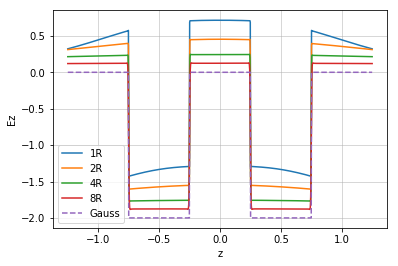

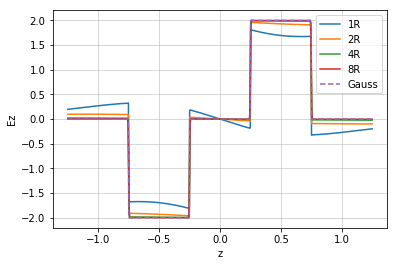

In [12]:
draw7(0,0.5,4,(-3/2)*0.5-0.5,(3/2)*0.5+0.5,1000)
draw7(1,0.5,4,(-3/2)*0.5-0.5,(3/2)*0.5+0.5,1000)

Como se pode observar nos gráficos representados, o aumento do raio dos discos faz com que o campo por estes criado se aproxime do campo criado por um plano infinito de acordo com o teorema de gauss, representado a tracejado.

# Exercício 2

1

In [13]:
def fi(i,r,theta,x,y,z,n):
    if i == 0:
        return (((r**2)*np.cos(n*theta)*(x-r*np.cos(theta)))/((x**2)+(y**2)+(r**2)+(z**2)-2*x*r*np.cos(theta)-2*y*r*np.sin(theta))**(3/2))
    if i == 1:
        return (((r**2)*np.cos(n*theta)*(y-r*np.sin(theta)))/((x**2)+(y**2)+(r**2)+(z**2)-2*x*r*np.cos(theta)-2*y*r*np.sin(theta))**(3/2))
    if i == 2:
        return (((r**2)*np.cos(n*theta)*z)/((x**2)+(y**2)+(r**2)+(z**2)-2*x*r*np.cos(theta)-2*y*r*np.sin(theta))**(3/2))
   
def Ei(i,x0,y0,z0,n,ax,bx,nx,ay,by,ny):
    hx = (bx-ax)/nx
    hy = (by-ay)/ny
    x = np.linspace(ax,bx,nx+1)
    #x = np.arange(ax,bx+hx,hx)
    y = np.linspace(ay,by,ny+1)
    #y = np.arange(ay,by+hy,hy)
    fy = y * 0
    for j in range(len(y)):
        fxyi = fi(i,x,y[j],x0,y0,z0,n)
        fy[j] = (1/3)*hx*(fxyi[0]+fxyi[-1]+4*np.sum(fxyi[1:-1:2])+2*np.sum(fxyi[2:-1:2]))
    s = (1/3)*hy*(fy[0]+fy[-1]+4*np.sum(fy[1:-1:2])+2*np.sum(fy[2:-1:2]))
    return s
    
#Ei(i,x0,y0,z0,n,ax,bx,nx,ay,by,ny)
def adaptative(i,x0,y0,z0,n,Mi,epsilon):
    I1 = Ei(i,x0,y0,z0,n,0,1,Mi,0,2*np.pi,Mi)
    e = 100
    while e > epsilon:
        Mi *= 2
        I2 = Ei(i,x0,y0,z0,n,0,1,Mi,0,2*np.pi,Mi)
        e = abs(I2-I1)/15
        I1 = I2
    return I1

print(Ei(0,1.01,0,0,0,0,1,1000,0,2*np.pi,1000))
print(adaptative(0,1.01,0,0,0,10,1e-6))

7.761059457591977
7.765945557140374


2

In [14]:
#Ei(i,x0,y0,z0,n,ax,bx,nx,ay,by,ny)
#adaptative(i,x0,y0,z0,n,Mi,epsilon)
def draw11(eixo,z1,z2,N,nbot,ntop):
    xn = np.linspace(z1,z2,N)
    comp = ['x','y','z']
    if eixo == 0:
        for l in [0,1,2]:
            grid(linewidth=0.5)
            for k in range(nbot,ntop+1):
                #Ezz = list(map(lambda z: Ei(l,0,0,z,k,0,1,100,0,2*np.pi,1000),zn))
                Exx = list(map(lambda x: adaptative(l,x,0,0,k,50,1e-8),xn))
                plot(xn,Exx,label='n = '+str(k))
            xlabel('x')
            ylabel('E'+comp[l]+' (x,0,0)')
            legend()
            show()
    if eixo == 2:
        for l in [0,1,2]:
            grid(linewidth=0.5)
            for k in range(nbot,ntop+1):
                #Ezz = list(map(lambda z: Ei(l,0,0,z,k,0,1,100,0,2*np.pi,1000),zn))
                Ezz = list(map(lambda z: adaptative(l,0,0,z,k,50,1e-8),xn))
                plot(xn,Ezz,label='n = '+str(k))
            xlabel('z')
            ylabel('E'+comp[l]+' (0,0,z)')
            legend()
            show()

C:\Users\leona\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


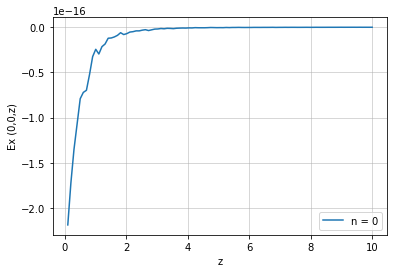

C:\Users\leona\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """


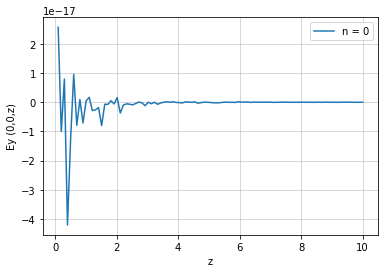

C:\Users\leona\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys


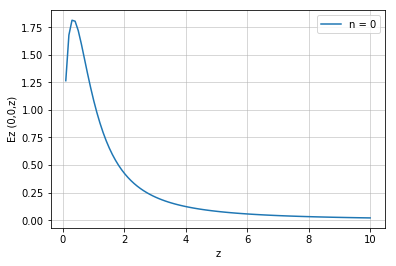

In [15]:
draw11(2,0,10,100,0,0)

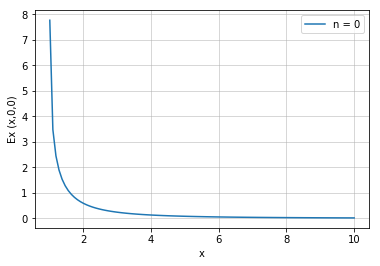

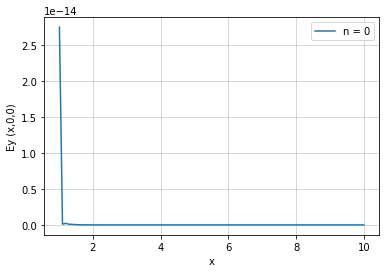

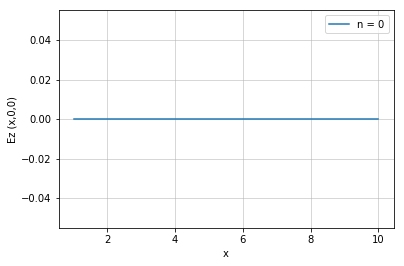

In [16]:
draw11(0,1.01,10,100,0,0)

C:\Users\leona\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


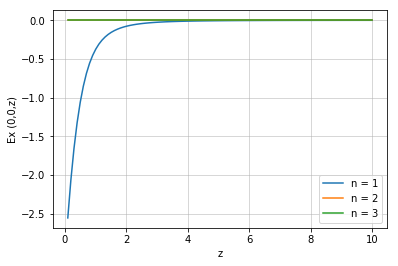

C:\Users\leona\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """


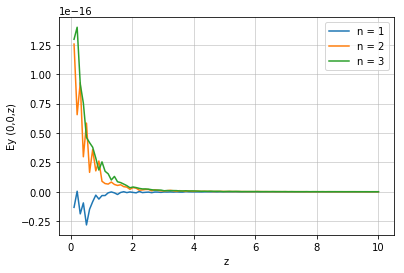

C:\Users\leona\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys


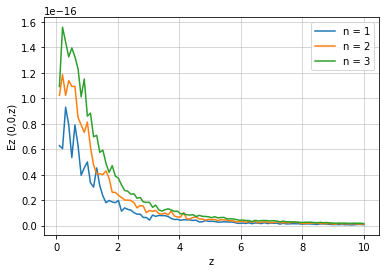

In [17]:
draw11(2,0,10,100,1,3)

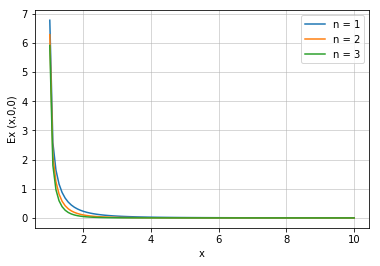

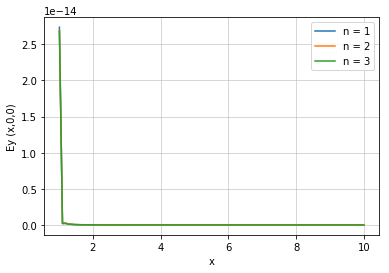

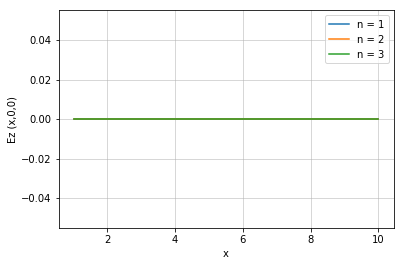

In [18]:
draw11(0,1.01,10,100,1,3)

3

Parâmetros de ajuste:
n = 0 [ 2.0943572  -0.45165071  1.99999529]
n = 1 [ 1.57877775 -3.19077659  3.00138883]
n = 2 [  1.42628136 -21.31819768   4.00258724]
n = 3 [   1.3242641  -150.50927919    5.00352762]


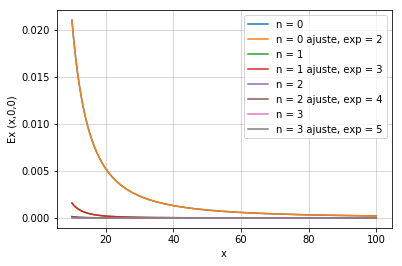

In [19]:
def depende(i,z1,z2):
    N = 500
    xn = np.linspace(z1,z2,N)
    if i == 0:
        grid(linewidth=0.5)
        for k in [0,1,2,3]:
            Exx = list(map(lambda x: adaptative(i,x,0,0,k,50,1e-8),xn))
            popt,pcov = opt.curve_fit(ajuste,xn,Exx)
            Eajuste = ajuste(xn,popt[0],popt[1],popt[2])
            print('n = '+str(k),popt)
            plot(xn,Exx,label='n = '+str(k))
            plot(xn,Eajuste,label='n = '+str(k)+' ajuste, '+'exp = '+str(int(round(popt[2]))))
        xlabel('x')
        ylabel('Ex (x,0,0)')
        legend()
        show()
print('Parâmetros de ajuste:')          
depende(0,10,100)

Após realizado o ajuste, percebemos que a componente Ex do campo elétrico, ao longo de uma linha (x,0,0), varia com x elevado a n+1. Porém, não consegui tirar nenhuma conclusão intuitiva do porquê desta dependência em x do campo, embora tenha claramente a haver com a forma como a carga está distribuída no disco. Quando n = 0, a densidade de carga tem simetria radial, e é proporcional a r, havendo mais carga na periferia do disco. Para n = 1,2,3, há uma quebra desta simetria, já que a densidade passa a depender de theta. Contudo, é bastante interessante que haja essa sucessão de expoentes, quando nos polinómios de legendre usados para aproximar o potencial numa expansão multipolar n = 0 representa um monopolo, que varia com o inverso do quadrado da distância, n = 1 representa um dipolo, que varia com o inverso do cubo da distância, e assim sucessivamente. Contudo, não consigo estabelecer uma correlação, já que o que observei é um "shift" de expoente por uma ordem do que acontece nos polinómios de legendre anteriormente referidos.